### Scheduled foreign exchange
The following dataset (*TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE*) deals with the scheduled commercial exchanges between Italy, the neighboring TSOs, Corsica, and Malta. Each day, the hourly commercial exchange program between the market zones is published

In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE" 
scheduled_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_forex = scheduled_forex.sort_values(by='ORAINI')

scheduled_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,IMPORT,EXPORT,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY,LOADTIME
0,201901010000,20190101,1,187.0,0.0,187.0,Austria,2024-10-17 11:55:53.327
1,201901010000,20190101,1,0.0,148.0,-148.0,Corsica,2024-10-17 11:55:53.327
2,201901010000,20190101,1,0.0,456.0,-456.0,France,2024-10-17 11:55:53.327
3,201901010000,20190101,1,0.0,310.0,-310.0,Greece,2024-10-17 11:55:53.327
4,201901010000,20190101,1,0.0,82.0,-82.0,Malta,2024-10-17 11:55:53.327
...,...,...,...,...,...,...,...,...
399691,202410272300,20241027,24,3096.5,0.0,3096.5,France,2024-10-28 07:30:08.203
399692,202410272300,20241027,24,500.0,0.0,500.0,Greece,2024-10-28 07:30:08.203
399693,202410272300,20241027,24,0.0,97.0,-97.0,Malta,2024-10-28 07:30:08.203
399694,202410272300,20241027,24,600.0,0.0,600.0,Montenegro,2024-10-28 07:30:08.203


SCHEDULED_FOREIGN_EXCHANGE_MW notation:
- sign + = import
- sign - = export

In [2]:
# Filter the DataFrame for the relevant columns and rows
scheduled_forex = scheduled_forex[['SCHEDULED_FOREIGN_EXCHANGE_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')
scheduled_forex.set_index('ORAINI', inplace=True)

scheduled_forex

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_11564\76702812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,187.0,Austria
2019-01-01 00:00:00,-148.0,Corsica
2019-01-01 00:00:00,-456.0,France
2019-01-01 00:00:00,-310.0,Greece
2019-01-01 00:00:00,-82.0,Malta
...,...,...
2024-10-27 23:00:00,3096.5,France
2024-10-27 23:00:00,500.0,Greece
2024-10-27 23:00:00,-97.0,Malta


In [3]:
# Get unique labels of the COUNTRY
unique_country_label = scheduled_forex['COUNTRY'].unique()

# Convert to list if needed
country_list = unique_country_label.tolist()

# Display the unique energy sources
print(country_list)

['Austria', 'Corsica', 'France', 'Greece', 'Malta', 'Slovenia', 'Switzerland', 'Montenegro']


### AUSTRIA

In [4]:
austria_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Austria')
austria_scheduled = austria_scheduled.drop(columns=['COUNTRY'])
austria_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,187.0
2019-01-01 01:00:00,187.0
2019-01-01 02:00:00,-145.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,187.0
...,...
2024-10-27 19:00:00,375.0
2024-10-27 20:00:00,375.0
2024-10-27 21:00:00,254.6


In [5]:
print("Macro-scale descriptive stats: AUSTRIA")
print(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: AUSTRIA
count    51042.000000
mean       205.841291
std        148.707418
min       -397.000000
25%        100.000000
50%        249.000000
75%        295.000000
max        676.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



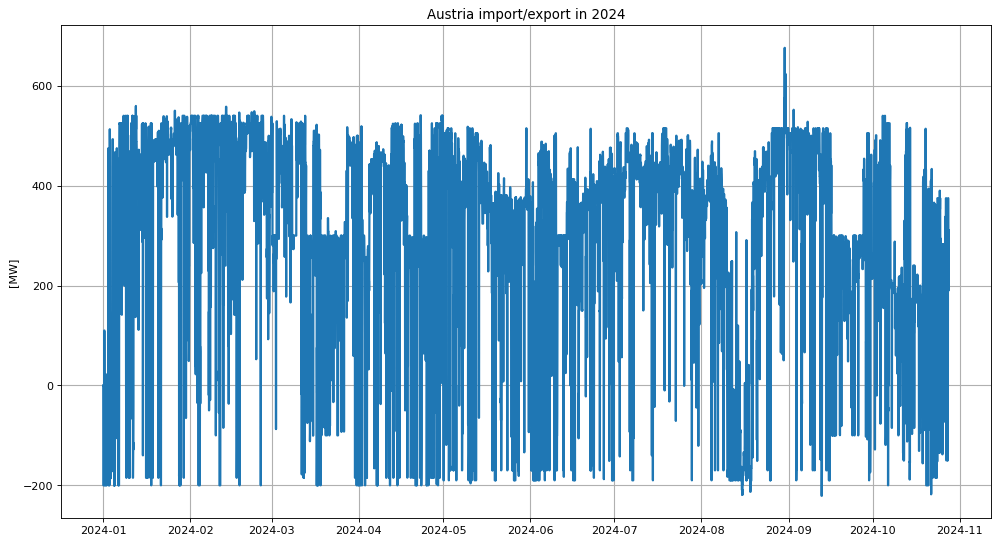

In [6]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Austria import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

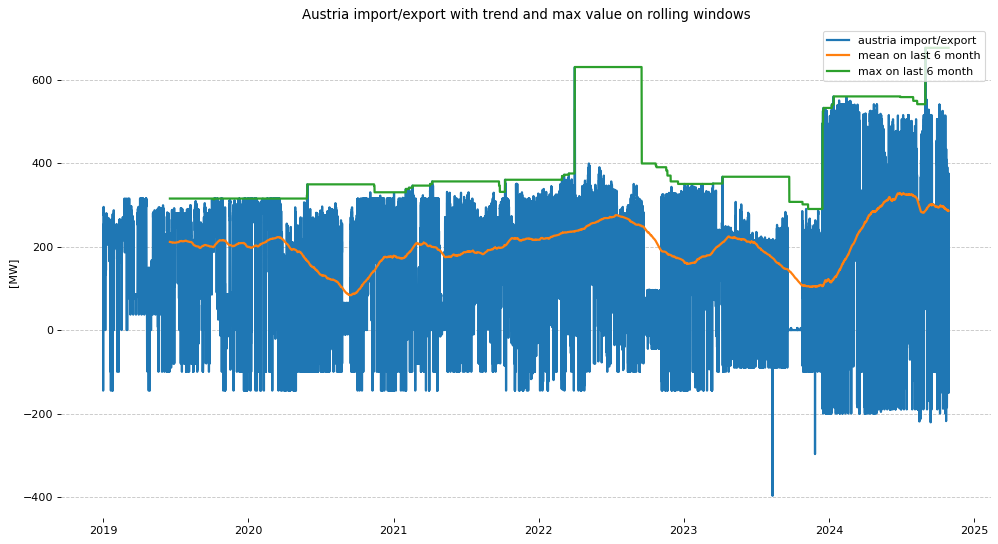

In [7]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'austria import/export') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Austria import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### CORSICA

In [8]:
corsica_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Corsica')
corsica_scheduled = corsica_scheduled.drop(columns=['COUNTRY'])
corsica_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-148.0
2019-01-01 01:00:00,-148.0
2019-01-01 02:00:00,-139.0
2019-01-01 03:00:00,-132.0
2019-01-01 04:00:00,-128.0
...,...
2024-10-27 19:00:00,-56.0
2024-10-27 20:00:00,-50.0
2024-10-27 21:00:00,-36.0


In [9]:
print("Macro-scale descriptive stats: CORSICA")
print(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: CORSICA
count    51042.000000
mean       -88.334019
std         37.107488
min       -148.000000
25%       -114.000000
50%        -92.000000
75%        -64.000000
max          0.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



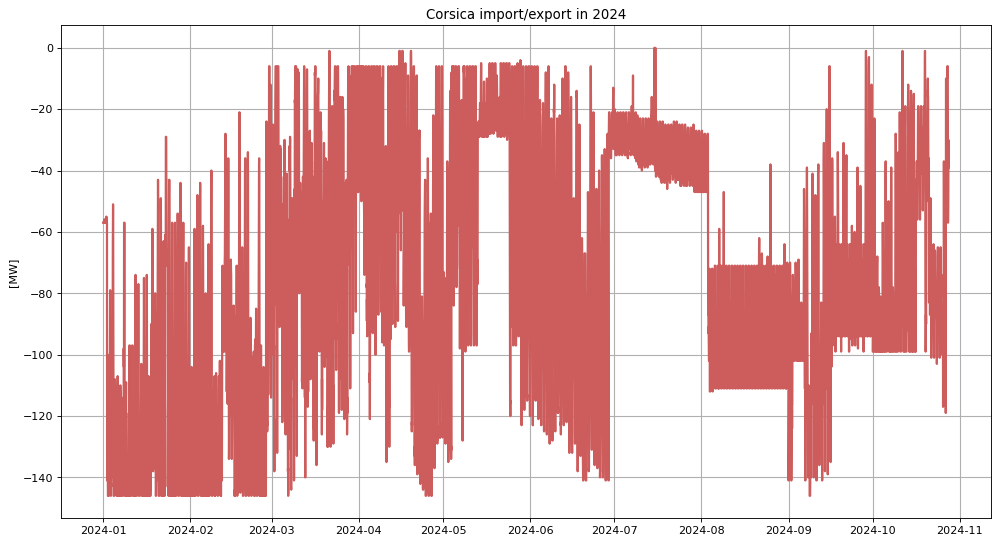

In [10]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'indianred') 

ax.set_title("Corsica import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

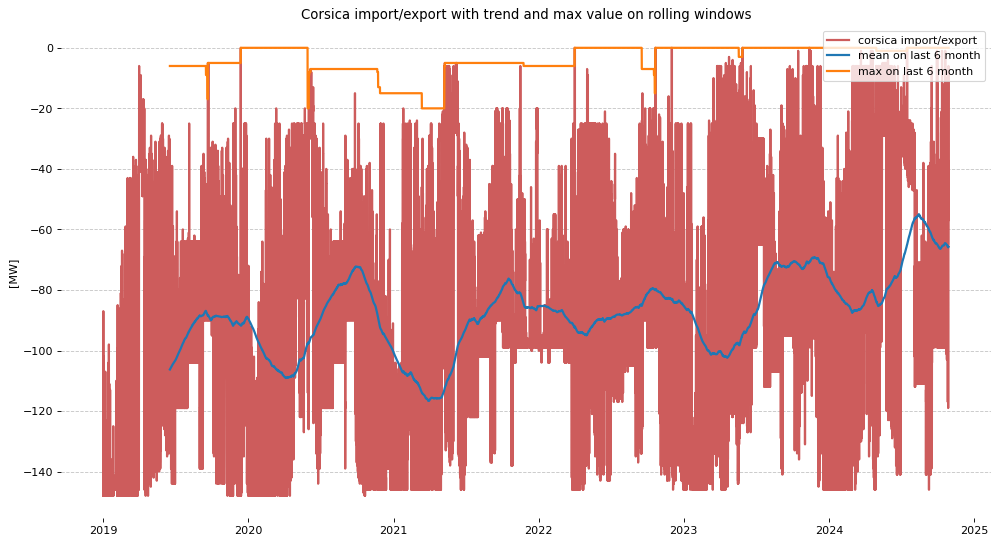

In [11]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'corsica import/export', color = 'indianred') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Corsica import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### FRANCE

In [12]:
france_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'France')
france_scheduled = france_scheduled.drop(columns=['COUNTRY'])
france_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-456.0
2019-01-01 01:00:00,-709.0
2019-01-01 02:00:00,-52.0
2019-01-01 03:00:00,-9.0
2019-01-01 04:00:00,-1160.0
...,...
2024-10-27 19:00:00,2900.0
2024-10-27 20:00:00,2900.0
2024-10-27 21:00:00,3200.0


In [13]:
print("Macro-scale descriptive stats: FRANCE")
print(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: FRANCE
count    51042.000000
mean      2105.262443
std       1105.192506
min      -1660.000000
25%       1544.000000
50%       2365.000000
75%       2866.700000
max       4947.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



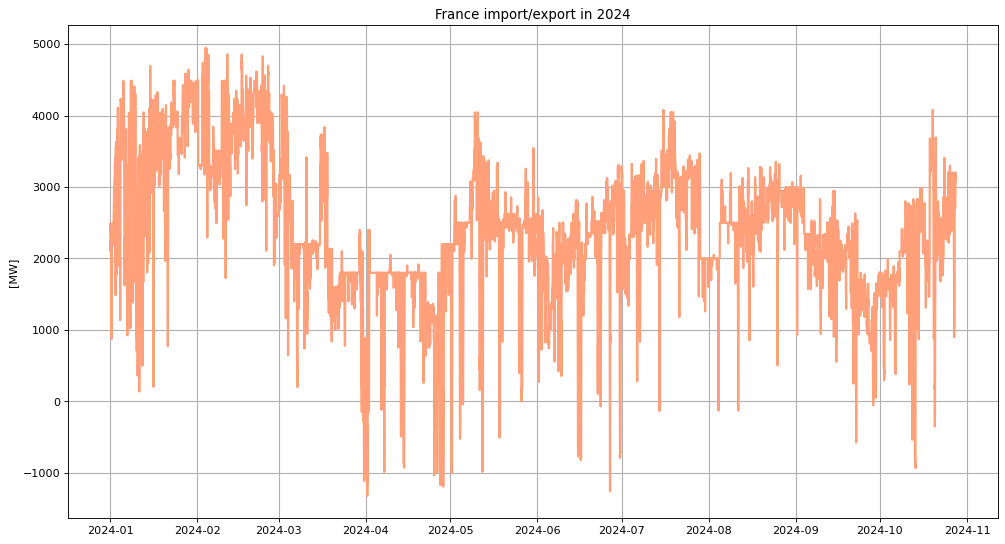

In [14]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightsalmon') 

ax.set_title("France import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

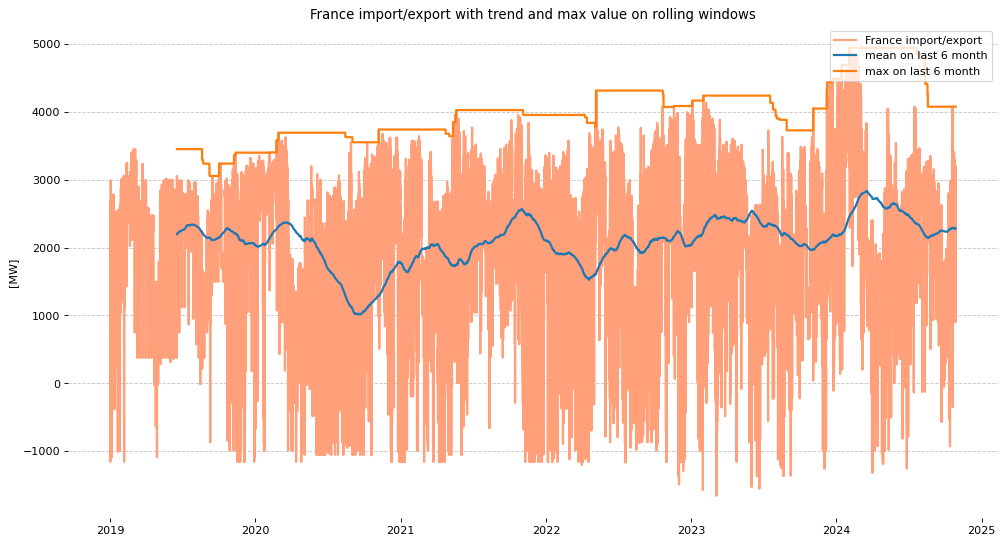

In [15]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'France import/export', color = 'lightsalmon') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("France import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SLOVENIA

In [16]:
slovenia_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Slovenia')
slovenia_scheduled = slovenia_scheduled.drop(columns=['COUNTRY'])
slovenia_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-377.0
2019-01-01 01:00:00,-214.0
2019-01-01 02:00:00,-561.0
2019-01-01 03:00:00,-184.0
2019-01-01 04:00:00,433.0
...,...
2024-10-27 19:00:00,122.4
2024-10-27 20:00:00,173.7
2024-10-27 21:00:00,356.3


In [17]:
print("Macro-scale descriptive stats: SLOVENIA")
print(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SLOVENIA
count    51042.000000
mean       241.339667
std        428.148574
min      -1116.000000
25%         -7.000000
50%        402.050000
75%        579.300000
max       1119.700000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



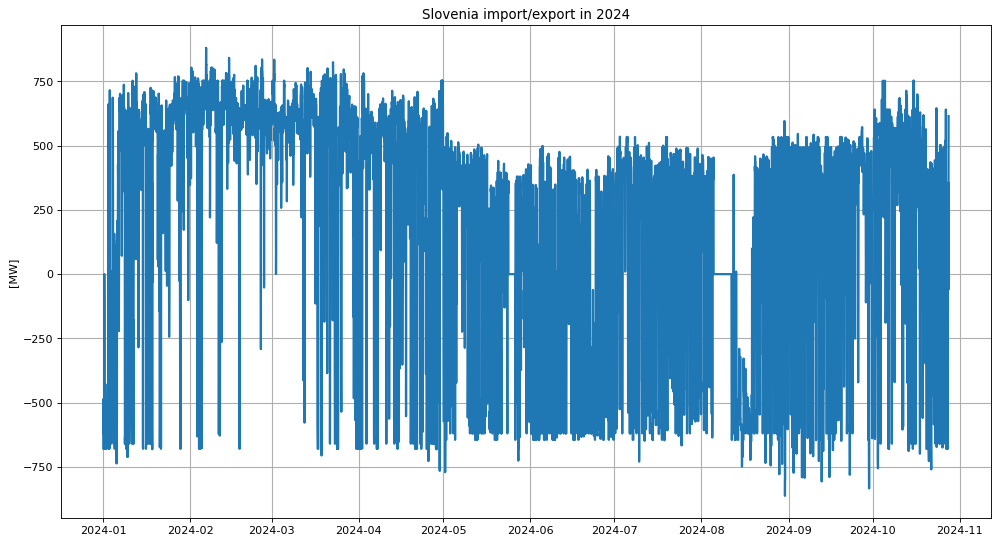

In [18]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Slovenia import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

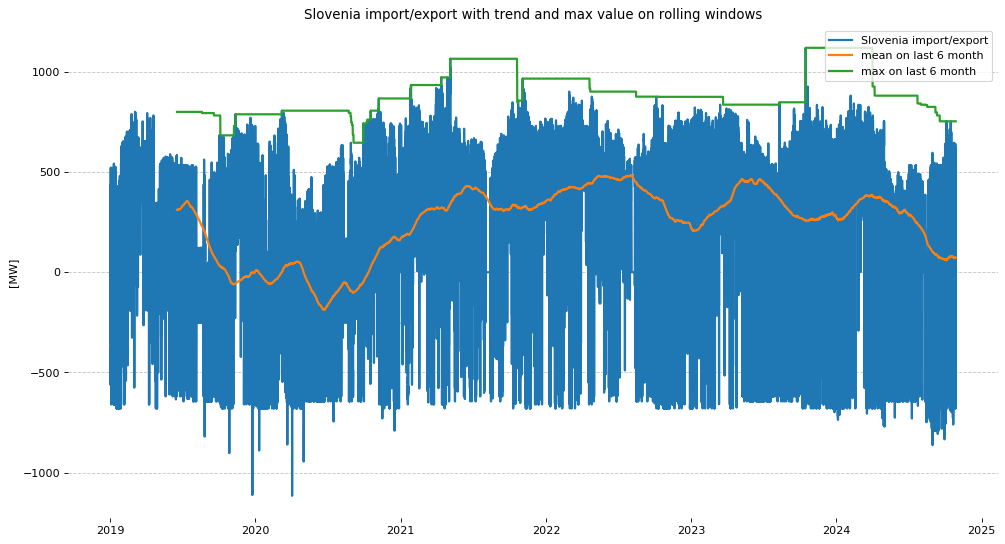

In [19]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Slovenia import/export') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Slovenia import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### GREECE

In [20]:
greece_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Greece')
greece_scheduled = greece_scheduled.drop(columns=['COUNTRY'])
greece_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-310.0
2019-01-01 01:00:00,-298.0
2019-01-01 02:00:00,-216.0
2019-01-01 03:00:00,-211.0
2019-01-01 04:00:00,-206.0
...,...
2024-10-27 19:00:00,-43.9
2024-10-27 20:00:00,396.6
2024-10-27 21:00:00,497.9


In [21]:
print("Macro-scale descriptive stats: GREECE")
print(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: GREECE
count    51042.000000
mean        -5.411465
std        379.329495
min       -594.700000
25%       -403.000000
50%          0.000000
75%        440.000000
max       1027.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



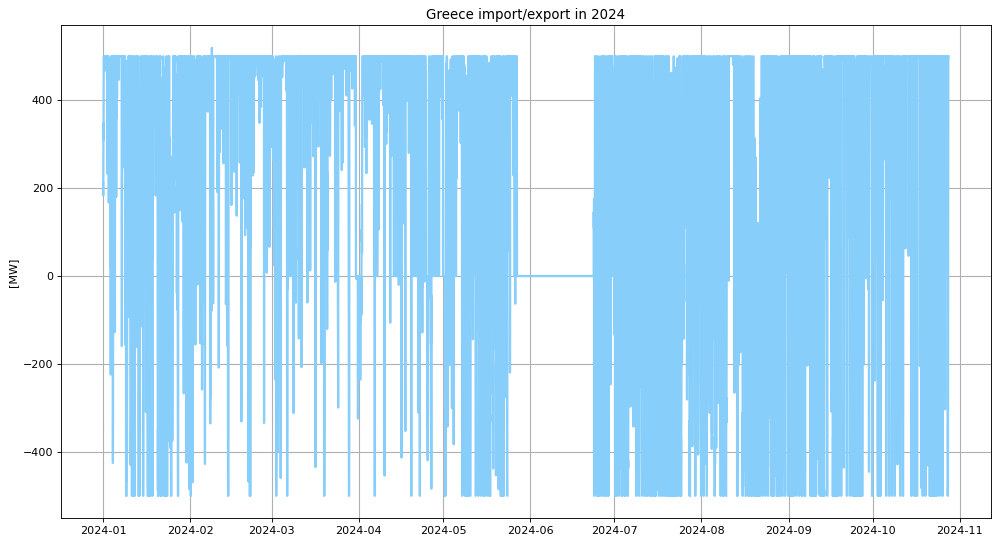

In [22]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightskyblue') 

ax.set_title("Greece import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

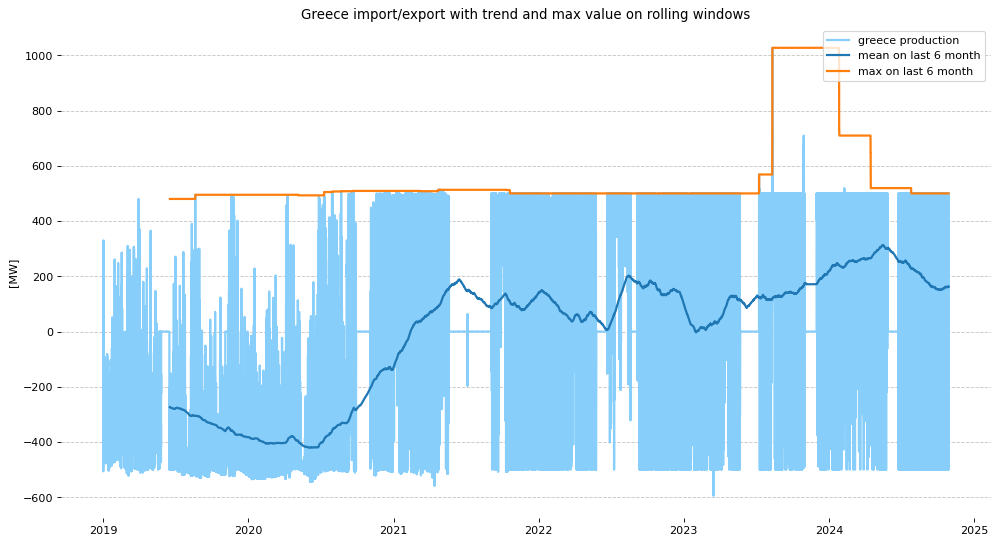

In [23]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'greece production', color = 'lightskyblue') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Greece import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SWITZERLAND

In [24]:
switzerland_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Switzerland')
switzerland_scheduled = switzerland_scheduled.drop(columns=['COUNTRY'])
switzerland_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,2413.0
2019-01-01 01:00:00,2217.0
2019-01-01 02:00:00,1956.0
2019-01-01 03:00:00,2162.0
2019-01-01 04:00:00,2227.0
...,...
2024-10-27 19:00:00,3590.0
2024-10-27 20:00:00,3696.0
2024-10-27 21:00:00,3488.0


In [25]:
print("Macro-scale descriptive stats: SWITZERLAND")
print(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SWITZERLAND
count    51042.000000
mean      2278.580777
std       1036.987864
min      -1910.000000
25%       1682.550000
50%       2364.450000
75%       2940.000000
max       4977.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



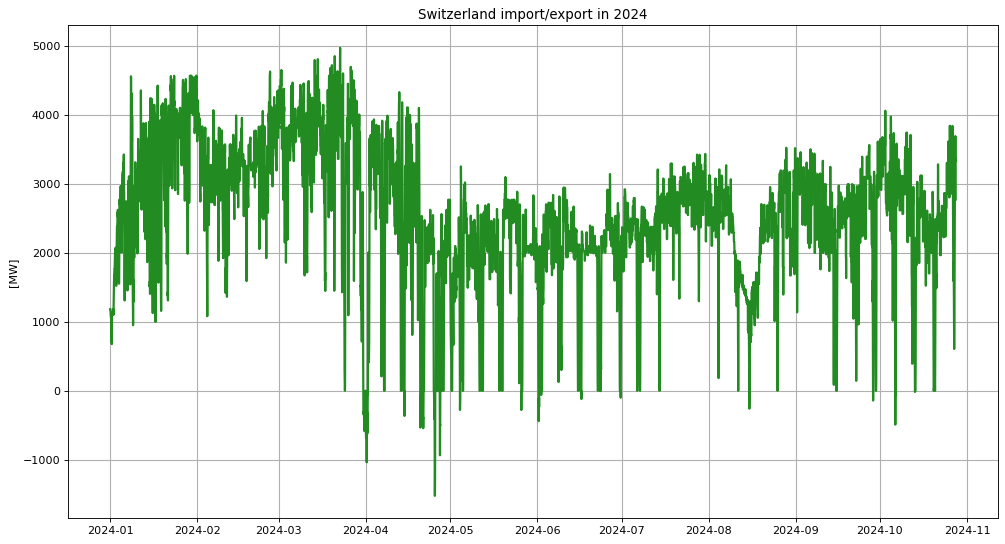

In [26]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'forestgreen') 

ax.set_title("Switzerland import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

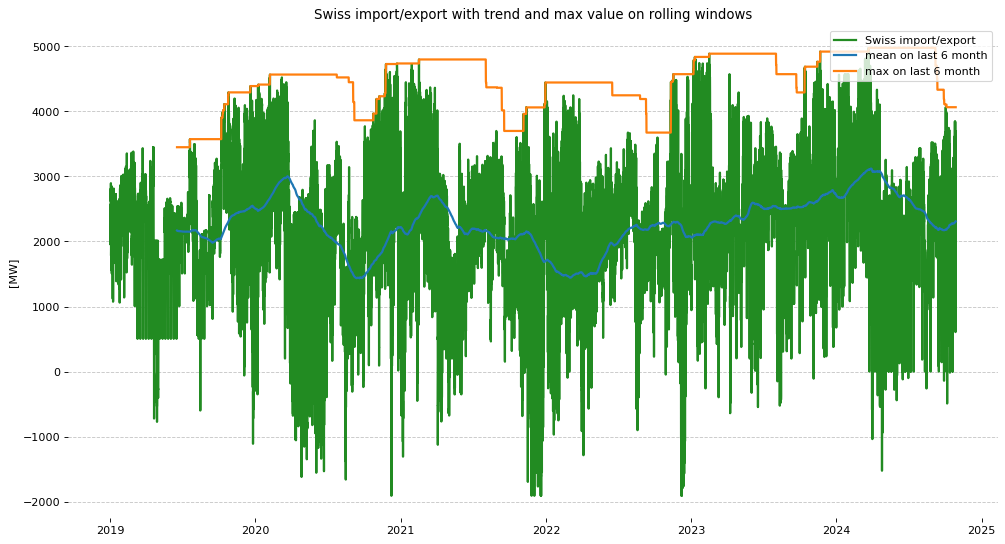

In [27]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Swiss import/export', color = 'forestgreen') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Swiss import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

# Scheduled internal exchange
The following dataset (TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE) deals with the scheduled trade between Italian market zones. Every day the hourly trade programme between market areas is published

In [28]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE"
scheduled_internal = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_internal = scheduled_internal.sort_values(by='ORAINI')

scheduled_internal

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,FLOW_FROM,FLOW_TO,SCHEDULED_INTERNAL_EXCHANGE_MW,LOADTIME
0,201901010000,20190101,1,CNOR,NORD,635.15,2024-10-17 15:14:38.297
1,201901010000,20190101,1,CSUD,CNOR,1815.90,2024-10-17 15:14:38.297
2,201901010000,20190101,1,SARD,CSUD,317.22,2024-10-17 15:14:38.297
3,201901010000,20190101,1,SUD,CSUD,2870.00,2024-10-17 15:14:38.297
4,201901010000,20190101,1,SUD,SICI,365.64,2024-10-17 15:14:38.297
...,...,...,...,...,...,...,...
221279,202410272000,20241027,21,SUD,CSUD,711.96,2024-10-28 07:35:07.510
221280,202410272100,20241027,22,SARD,CSUD,91.19,2024-10-28 07:35:07.510
221281,202410272100,20241027,22,SUD,CSUD,124.45,2024-10-28 07:35:07.510
221282,202410272200,20241027,23,SARD,CSUD,171.57,2024-10-28 07:35:07.510


In [29]:
# Filter the DataFrame for the relevant columns and rows
scheduled_internal = scheduled_internal[['SCHEDULED_INTERNAL_EXCHANGE_MW', 'ORAINI', 'FLOW_FROM', 'FLOW_TO']]
# Convert ORAINI to datetime using the correct method
scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')
scheduled_internal.set_index('ORAINI', inplace=True)

scheduled_internal

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_11564\3452006321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_INTERNAL_EXCHANGE_MW,FLOW_FROM,FLOW_TO
ORAINI,,,
2019-01-01 00:00:00,635.15,CNOR,NORD
2019-01-01 00:00:00,1815.90,CSUD,CNOR
2019-01-01 00:00:00,317.22,SARD,CSUD
2019-01-01 00:00:00,2870.00,SUD,CSUD
2019-01-01 00:00:00,365.64,SUD,SICI
...,...,...,...
2024-10-27 20:00:00,711.96,SUD,CSUD
2024-10-27 21:00:00,91.19,SARD,CSUD
2024-10-27 21:00:00,124.45,SUD,CSUD


In [30]:
filtered_data = scheduled_internal[(scheduled_internal['FLOW_FROM'] == 'CNOR') & (scheduled_internal['FLOW_TO'] == 'NORD')]
filtered_data = filtered_data['SCHEDULED_INTERNAL_EXCHANGE_MW'] 
filtered_data

ORAINI
2019-01-01 00:00:00     635.15
2019-01-01 01:00:00     940.59
2019-01-01 02:00:00    1372.39
2019-01-01 03:00:00    1617.07
2019-01-01 04:00:00    1921.50
                        ...   
2024-10-21 11:00:00      94.34
2024-10-21 12:00:00      87.16
2024-10-21 13:00:00     161.25
2024-10-27 10:00:00     251.20
2024-10-27 11:00:00     452.38
Name: SCHEDULED_INTERNAL_EXCHANGE_MW, Length: 17727, dtype: float64

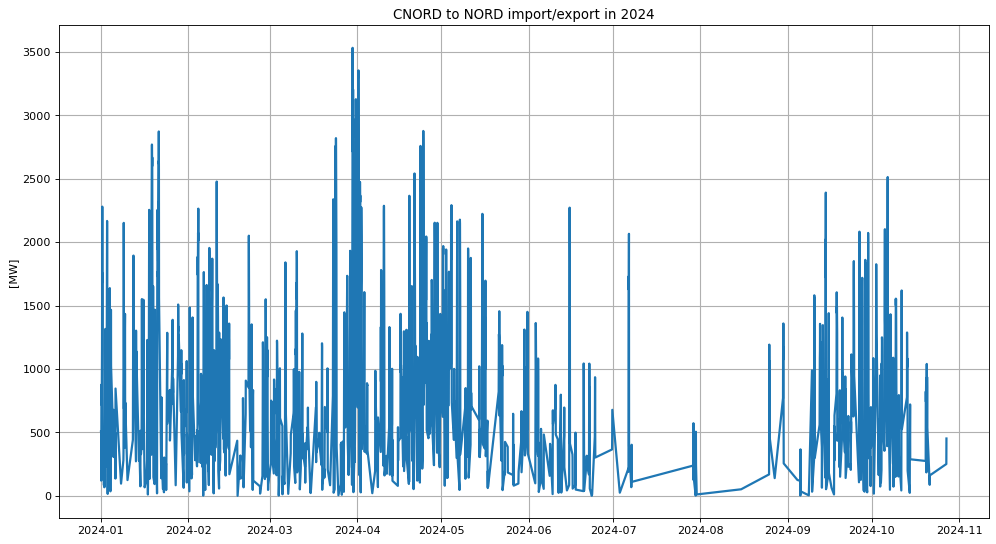

In [31]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(filtered_data.loc["2024"], linewidth=2) 

ax.set_title("CNORD to NORD import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

# Physical Foreign flow

In [32]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_PHYSICAL_FOREIGN_FLOW" 
physical_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
physical_forex = physical_forex.sort_values(by='ORAINI')

physical_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,COUNTRY,IMPORT,EXPORT,PHYSICAL_FOREIGN_FLOW_MW,LOADTIME
0,201901010000,20190101,1,Austria,156.0,0.0,156.0,2024-10-17 15:56:56.080
1,201901010000,20190101,1,Corsica,0.0,142.0,-142.0,2024-10-17 15:56:56.080
2,201901010000,20190101,1,France,175.0,497.0,-321.0,2024-10-17 15:56:56.080
3,201901010000,20190101,1,Greece,0.0,313.0,-313.0,2024-10-17 15:56:56.080
4,201901010000,20190101,1,Malta,0.0,80.0,-80.0,2024-10-17 15:56:56.080
...,...,...,...,...,...,...,...,...
399691,202410272300,20241027,24,France,3399.0,0.0,3399.0,2024-10-28 06:40:06.017
399692,202410272300,20241027,24,Greece,498.0,0.0,498.0,2024-10-28 06:40:06.017
399693,202410272300,20241027,24,Malta,0.0,93.0,-93.0,2024-10-28 06:40:06.017
399694,202410272300,20241027,24,Montenegro,602.0,0.0,602.0,2024-10-28 06:40:06.017


In [33]:
# Filter the DataFrame for the relevant columns and rows
physical_forex = physical_forex[['PHYSICAL_FOREIGN_FLOW_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
physical_forex['ORAINI'] = pd.to_datetime(physical_forex['ORAINI'], format='%Y%m%d%H%M')
physical_forex.set_index('ORAINI', inplace=True)

physical_forex

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_11564\701593090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_forex['ORAINI'] = pd.to_datetime(physical_forex['ORAINI'], format='%Y%m%d%H%M')


,PHYSICAL_FOREIGN_FLOW_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,156.0,Austria
2019-01-01 00:00:00,-142.0,Corsica
2019-01-01 00:00:00,-321.0,France
2019-01-01 00:00:00,-313.0,Greece
2019-01-01 00:00:00,-80.0,Malta
...,...,...
2024-10-27 23:00:00,3399.0,France
2024-10-27 23:00:00,498.0,Greece
2024-10-27 23:00:00,-93.0,Malta


In [34]:
# Get unique labels of the COUNTRY
unique_country_label = physical_forex['COUNTRY'].unique()

# Convert to list if needed
country_list = unique_country_label.tolist()

# Display the unique energy sources
print(country_list)

['Austria', 'Corsica', 'France', 'Greece', 'Malta', 'Slovenia', 'Switzerland', 'Montenegro']


In [35]:
austria_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Austria')
austria_physical = austria_physical.drop(columns=['COUNTRY'])

corsica_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Corsica')
corsica_physical = corsica_physical.drop(columns=['COUNTRY'])

france_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'France')
france_physical = france_physical.drop(columns=['COUNTRY'])

greece_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Greece')
greece_physical = greece_physical.drop(columns=['COUNTRY'])

malta_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Malta')
malta_physical = malta_physical.drop(columns=['COUNTRY'])

slovenia_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Slovenia')
slovenia_physical = slovenia_physical.drop(columns=['COUNTRY'])

switzerland_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Switzerland')
switzerland_physical = switzerland_physical.drop(columns=['COUNTRY'])

montenegno_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Montenegno')
montenegno_physical = montenegno_physical.drop(columns=['COUNTRY'])

# Scheduled internal flow

In [81]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE"
scheduled_internal = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_internal = scheduled_internal.sort_values(by='ORAINI')

scheduled_internal

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,FLOW_FROM,FLOW_TO,SCHEDULED_INTERNAL_EXCHANGE_MW,LOADTIME
0,201901010000,20190101,1,CNOR,NORD,635.15,2024-10-17 15:14:38.297
1,201901010000,20190101,1,CSUD,CNOR,1815.90,2024-10-17 15:14:38.297
2,201901010000,20190101,1,SARD,CSUD,317.22,2024-10-17 15:14:38.297
3,201901010000,20190101,1,SUD,CSUD,2870.00,2024-10-17 15:14:38.297
4,201901010000,20190101,1,SUD,SICI,365.64,2024-10-17 15:14:38.297
...,...,...,...,...,...,...,...
221279,202410272000,20241027,21,SUD,CSUD,711.96,2024-10-28 07:35:07.510
221280,202410272100,20241027,22,SARD,CSUD,91.19,2024-10-28 07:35:07.510
221281,202410272100,20241027,22,SUD,CSUD,124.45,2024-10-28 07:35:07.510
221282,202410272200,20241027,23,SARD,CSUD,171.57,2024-10-28 07:35:07.510


In [82]:
# Filter the DataFrame for the relevant columns and rows
scheduled_internal = scheduled_internal[['SCHEDULED_INTERNAL_EXCHANGE_MW', 'ORAINI', 'FLOW_FROM', 'FLOW_TO']]
# Convert ORAINI to datetime using the correct method
scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')
scheduled_internal.set_index('ORAINI', inplace=True)

scheduled_internal

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_11564\3452006321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_INTERNAL_EXCHANGE_MW,FLOW_FROM,FLOW_TO
ORAINI,,,
2019-01-01 00:00:00,635.15,CNOR,NORD
2019-01-01 00:00:00,1815.90,CSUD,CNOR
2019-01-01 00:00:00,317.22,SARD,CSUD
2019-01-01 00:00:00,2870.00,SUD,CSUD
2019-01-01 00:00:00,365.64,SUD,SICI
...,...,...,...
2024-10-27 20:00:00,711.96,SUD,CSUD
2024-10-27 21:00:00,91.19,SARD,CSUD
2024-10-27 21:00:00,124.45,SUD,CSUD


In [83]:
scheduled_internal = scheduled_internal[(scheduled_internal['FLOW_FROM'] == 'CNOR') & (scheduled_internal['FLOW_TO'] == 'NORD') ]
scheduled_internal = scheduled_internal.drop(columns=['FLOW_FROM','FLOW_TO'])
scheduled_internal

,SCHEDULED_INTERNAL_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,635.15
2019-01-01 01:00:00,940.59
2019-01-01 02:00:00,1372.39
2019-01-01 03:00:00,1617.07
2019-01-01 04:00:00,1921.50
...,...
2024-10-21 11:00:00,94.34
2024-10-21 12:00:00,87.16
2024-10-21 13:00:00,161.25
